<img src="https://communications.univie.ac.at/fileadmin/_processed_/csm_Uni_Logo_2016_2f47aacf37.jpg" 
     alt="Logo Universität Wien" 
     width="200"/>

# Practical Machine Learning for Natural Language Processing - 2023 SS  

### Assigment 2 - Generators and Classes   

In this assigment we are going to play with generators and instances/classes - structures that retain state.  

***

### 1. Alea Iacta Est  

(a) Using [generator functions](https://github.com/rsouza/Python_Course/blob/master/Notebooks/Python_Basic/03_Functions.ipynb), create an object that emulates an eight-sided dice (1-8) that is biased, such that the probability of this generator function returning a certain value is proportional to the value itself (i.e. the face "6" is 3 times more likely to come out than face "2");  

 <img src="https://cdn11.bigcommerce.com/s-70184/images/stencil/608x608/products/532/7428/d8-dice-blue__64321.1664335674.jpg" alt="8-Dice" style="width:250px;height:300px;"> 

(b) Using [Matplotlib](https://matplotlib.org/) plt.plot or plt.hist commands, show graphically the result of 10000 casts of the die;  

(c) Modify this generator function so that it terminates automatically when all possible values (1,2,3,4,5,6,7,8) have been cast at least once. In this case, it will return the total absolute time that has elapsed since the first iteration.  (hint: a function can have both **return** and **yield** commands)  

In [74]:
# a) 
import random
    
def dice_rolling(casts):
    dice = ([i, i*(1/sum(range(1, 9)))] for i in range(1, 9))
    values = []
    p = []
    for m,n in dice:
        values.append(m)
        p.append(n)
    return(random.choices(values, weights=p, k=casts))


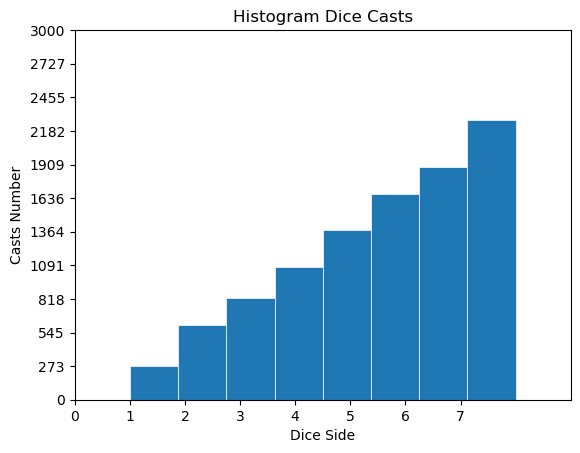

In [93]:
# b)
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

x = np.array(dice_rolling(10000))

# plot:

fig, ax = plt.subplots()

ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, 9), xticks=np.arange(0, 8),
       ylim=(0, 3000), yticks=np.linspace(0, 3000, 12))
plt.xlabel('Dice Side')
plt.ylabel('Casts Number')
plt.title('Histogram Dice Casts')

plt.show()

In [111]:
# c)
def dice_rolling_modify():
    dice = ([i, i*(1/sum(range(1, 9)))] for i in range(1, 9))
    values = []
    p = []
    for m,n in dice:
        values.append(m)
        p.append(n)
    dice_rolls = []
    counter = 0
    for i in range(1, 9):
        while i not in dice_rolls:
            dice_rolls.append(random.choices(values, weights=p)[0])
            counter += 1
    return counter
print(dice_rolling_modify())

48


### 2. A ticket to the first Class    

+ Create a Class called "Elevator". Each instance of this class receives as parameters the number of floors in the building and starts the elevator on the lowest floor.  
+ This Class should have methods and properties to allow the elevator to:
<br></br>
    + Receive a call - user(s) press a button to go to specific floor(s);  
    + Receive a floor as a destination - when users enter the elevator, each one may press a button to choose destination floor;  
    + Store and inform which floor the elevator is at each moment(consider that trips for consecutive floors takes 5 seconds, and stopping takes 10 seconds);  
    + Store and inform which users are in the elevator;  
    + Store and inform the sequence of floors yet to be visited;  
    + Store the number of times the elevator stopped in each floor (passing through the floor without "stopping" on the floor does not count);  
    + Refuses commands to go to inexistent floors.  
<br></br>
+ Simulate the behavior of the elevator serving ten users, each one calling from a random floor, and chosing a random destination floor.   
+ Graphically illustrate the current elevator position for the requested simulation.   
+ (BONUS) Create a smart building simulator, controlling calls made to n > 1 elevators and routing elevator properly.  

In [1]:
class Elevator:
    def __init__(self, floor_num, pickup, dropoff):
        self.cur_floor = 0
        self.floors = floor_num
        self.visited_floors = []
        self.pickup = pickup
        self.dropoff = dropoff
        self.users = {}
        self.users_present = []
        self.timetable = []
        self.time = 0
         
        
        if self.correct(pickup) == True and self.correct(dropoff)== True:
            self.order(pickup, dropoff)
            
    
    def correct(self,nums):
        if len(nums) > 1:
            for i in nums:
                if i > self.floors or i < 0:
                    print("The requested floor does not exist, please request a different floor.")
                    quit()
                elif len(self.pickup) != len(self.dropoff):
                    print("There is no equal number of pickup and dropoff. Please, try again")
                    quit()
            return True
        if i > self.floors or i < 0:
            print("The requested floor does not exist, please request a different number.")
            quit()
        else:
            print("Got it")
            return True
    
    #a function to go up
    def go_up(self, floor_now, floor_goal):
        f = floor_now
        for i in range(floor_now, floor_goal-1):
            f = f + 1
            self.time += 5
            print("*MOVING*\n Floor: ", f)
        floor_now = f + 1
        self.time += 10
        self.timetable.append([floor_now, self.time])
        print( "*MOVING*\n*STOPPING*\nYou arrived to the floor: ", floor_now)
        return floor_now
    
    #a function to go down   
    def go_down(self, floor_now, floor_goal):
        now_floor = floor_now
        for i in range(now_floor, floor_goal+1, -1):
            floor_now = floor_now - 1
            self.time += 5
            print( "*MOVING* Floor: ", floor_now)
        floor_now = floor_now - 1
        self.time += 10
        self.timetable.append([floor_now, self.time])
        print( "*MOVING\n*STOPPING*\n You arrived to the floor: ", floor_now)
        return floor_now

    #a function to display current users            
    def user_funct(self):
        print("There are ", len(self.users_present), "users in the elevator:" )
        for l,k in self.users_present:
            print("Entered floor: ",l , "Leaving floor: ", k)
            
   
    #a function to display visited floors                   
    def visited(self):
        sorted_visited = {}
        for i in self.visited_floors:
            if i in sorted_visited.keys():
                sorted_visited[i] += 1
            else:
                sorted_visited[i] = 1
                
        print("Visited floors: ", sorted_visited)
    
    def time_traveling(self):
        return(self.timetable)
    
    def remaining(self):
        floors_left = [l for k,l in self.users_present]
        if len(floors_left) > 0:
            print("Remaining floors to travel to: ", set(floors_left))
        return floors_left

    #a function to pick up a user
    def pick(self, pickup_floor, dropoff_floor):
        if self.cur_floor == pickup_floor:
            print("User(s) entered at the floor", self.cur_floor)
        elif pickup_floor < dropoff_floor:
            print("*** Elevator called at the floor", pickup_floor,"***")
            self.cur_floor = self.go_up(self.cur_floor, pickup_floor)
        else:
            print("*** Elevator called at the floor", pickup_floor,"***")
            self.cur_floor = self.go_down(self.cur_floor, pickup_floor)
        self.users_present.append([pickup_floor, dropoff_floor])
        [self.users_present.remove([m,n]) for m, n in self.users_present if self.cur_floor == n]
        self.user_funct()
        self.remaining()
        self.visited_floors.append(pickup_floor)
        
        
    #a function to drop off a user    
    def drop(self, pickup_floor, dropoff_floor):  
        if self.cur_floor == dropoff_floor:
            pass
        elif pickup_floor < dropoff_floor:
            self.cur_floor = self.go_up(self.cur_floor, dropoff_floor)
        elif pickup_floor > dropoff_floor:
            self.cur_floor = self.go_down(self.cur_floor, dropoff_floor)
            
        print("User(s) left at the floor", self.cur_floor)
        self.users_present.remove([pickup_floor, dropoff_floor])
        self.user_funct()
        self.remaining()
        self.visited_floors.append(dropoff_floor)
        
        
    #a function to order the floors to visit
    def order(self, p, d):
        going_up = []
        going_down = []
        up_floors_list = []
        down_floors_list = []
                              
        if len(p)>1 or len(d)>1:
            for i in range(len(p)):
                self.users[p[i]]= d[i]
                if p[i] < d[i]:
                    going_up.append([p[i],d[i]])
                    going_up.sort(key=lambda x: x[0]) 
                    up_floors_list.append(p[i])
                    up_floors_list.append(d[i])
                    
                else:
                    going_down.append([p[i],d[i]])
                    going_down.sort(key=lambda x: x[0], reverse = True)
                    down_floors_list.append(p[i])
                    down_floors_list.append(d[i])
        up_floors_list_sorted = sorted(set(up_floors_list))
        down_floors_list_sorted = sorted(set(down_floors_list), reverse = True)
        
        turn_up = 0
        for i in up_floors_list_sorted:
            if [True for n, m in going_up if n == i]:
                for n, m in [[n,m] for n, m in going_up if n == i]:
                    self.pick(n, m)
                    turn_up = 1
            elif turn_up == 1 and [True for n, m in going_up if m == i]:
                for n, m in [[n,m] for n, m in going_up if m == i]:
                    self.drop(n, m)
                
        turn_down = 0
        
        for i in down_floors_list_sorted:
            if [True for n, m in going_down if n == i]:
                for n, m in [[n,m] for n, m in going_down if n == i]:
                    self.pick(n, m)
                    turn_down = 1
            elif turn_down == 1 and [True for n, m in going_down if m == i]:
                for n, m in [[n,m] for n, m in going_down if m == i]:
                    self.drop(n,m)


In [2]:
#Simulate the behavior of the elevator serving ten users, 
#each one calling from a random floor, and chosing a random destination floor.
import random

in_floors = [random.randint(0,19) for i in range(10)]
out_floors = [random.randint(0,19) for i in range(10)]

elevator1 = Elevator(19, in_floors, out_floors) 

going up: [[0, 17], [2, 18], [3, 5], [5, 7], [10, 15], [14, 15]]
up sorted [0, 2, 3, 5, 7, 10, 14, 15, 17, 18]
going down [[14, 3], [12, 9], [9, 1], [5, 0]]
down sorted [14, 12, 9, 5, 3, 1, 0]
User(s) entered at the floor 0
There are  1 users in the elevator:
Entered floor:  0 Leaving floor:  17
Remaining floors to travel to:  {17}
*** Elevator called at the floor 2 ***
*MOVING*
 Floor:  1
*MOVING*
*STOPPING*
You arrived to the floor:  2
There are  2 users in the elevator:
Entered floor:  0 Leaving floor:  17
Entered floor:  2 Leaving floor:  18
Remaining floors to travel to:  {17, 18}
*** Elevator called at the floor 3 ***
*MOVING*
*STOPPING*
You arrived to the floor:  3
There are  3 users in the elevator:
Entered floor:  0 Leaving floor:  17
Entered floor:  2 Leaving floor:  18
Entered floor:  3 Leaving floor:  5
Remaining floors to travel to:  {17, 18, 5}
*** Elevator called at the floor 5 ***
*MOVING*
 Floor:  4
*MOVING*
*STOPPING*
You arrived to the floor:  5
There are  3 users in

Text(0.5, 1.0, 'Traveling time plot')

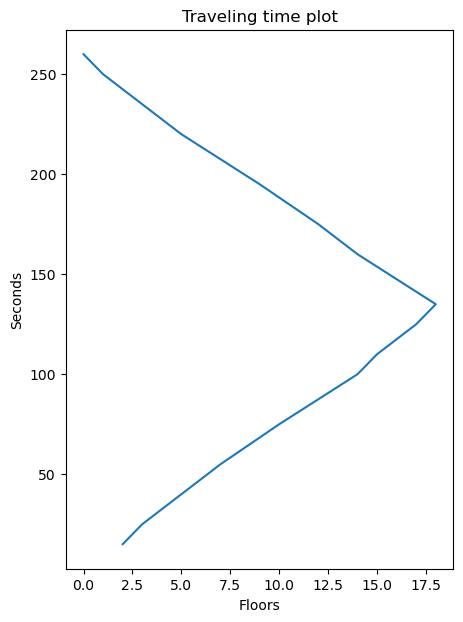

In [7]:
#Graphically illustrate the current elevator position for the requested simulation.
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

time_elevator1 = elevator1.time_traveling()

fig, ax = plt.subplots(figsize=(5, 7))
ax.plot([i[0] for i in time_elevator1], [i[1] for i in time_elevator1])
ax.set_xlabel('Floors')  # Add an x-label to the axes.
ax.set_ylabel('Seconds')  # Add a y-label to the axes.
ax.set_title("Traveling time plot")  # Add a title to the axes.

In [25]:
#a new version but unsure how to implement time
#Work in progress
import random

class Elevator1:
    def __init__(self, floor_num):
        self.cur_floor = 0
        self.floors = floor_num
        self.visited_floors = []
        self.users_present = []
        self.users = {}
        self.timetable = []
        self.time = 0
        
        self.going_up = []
        self.going_down = []
        self.up_floors_list = []
        self.down_floors_list = []
        
        self.begin()
             
    def begin(self):
        #the number of passengers can be changed
        #passenger = self.entering_and_leaving(1)
        
        for i in range(10):
            cur_passenger = self.entering_and_leaving(1)
            x, y = cur_passenger
            self.order(int(x[0]), int(y[0]))
            
           
    def entering_and_leaving(self, passengers):
        
        in_floor = [random.randint(0,self.floors) for i in range(passengers)]
        out_floor = [random.randint(0,self.floors)]
        return in_floor, out_floor
        
    def correct(self, in_floor, out_floor):
        if in_floor == out_floor:
            print ("It is not possible to request and leave at the same floor")
            return False
    

    #a function to go up
    def go_up(self, floor_now, floor_goal):
        f = floor_now
        for i in range(floor_now, floor_goal-1):
            f = f + 1
            self.time += 5
            print("*MOVING*\n Floor: ", f)
        floor_now = f + 1
        self.time += 10
        self.timetable.append([floor_now, self.time])
        print( "*MOVING*\n*STOPPING*\nYou arrived to the floor: ", floor_now)
        return floor_now
    
    #a function to go down   
    def go_down(self, floor_now, floor_goal):
        now_floor = floor_now
        for i in range(now_floor, floor_goal+1, -1):
            floor_now = floor_now - 1
            self.time += 5
            print( "*MOVING* Floor: ", floor_now)
        floor_now = floor_now - 1
        self.time += 10
        self.timetable.append([floor_now, self.time])
        print( "*MOVING\n*STOPPING*\n You arrived to the floor: ", floor_now)
        return floor_now
    
    #a function to display current users            
    def user_funct(self):
        print("There are ", len(self.users_present), "users in the elevator:" )
        for l,k in self.users_present:
            print("Entered floor: ",l , "Leaving floor: ", k)
            
    #a function to display visited floors                   
    def visited(self):
        sorted_visited = {}
        for i in self.visited_floors:
            if i in sorted_visited.keys():
                sorted_visited[i] += 1
            else:
                sorted_visited[i] = 1      
        print("Visited floors: ", sorted_visited)
    
    #a function to create a time table for traveling across floors
    def time_traveling(self):
        return(self.timetable)
    
    #a function to display how many floors are left to travel to 
    def remaining(self):
        floors_left = [l for k,l in self.users_present]
        if len(floors_left) > 0:
            print("Remaining floors to travel to: ", set(floors_left))
        return floors_left

    #a function to pick up a user
    def pick(self, pickup_floor, dropoff_floor):
        if self.cur_floor == pickup_floor:
            print("User(s) entered at the floor", self.cur_floor)
        elif pickup_floor < dropoff_floor:
            print("*** Elevator called at the floor", pickup_floor,"***")
            self.cur_floor = self.go_up(self.cur_floor, pickup_floor)
        else:
            print("*** Elevator called at the floor", pickup_floor,"***")
            self.cur_floor = self.go_down(self.cur_floor, pickup_floor)
        self.users_present.append([pickup_floor, dropoff_floor])
        [self.users_present.remove([m,n]) for m, n in self.users_present if self.cur_floor == n]
        self.user_funct()
        self.remaining()
        self.visited_floors.append(pickup_floor)
        
        
    #a function to drop off a user    
    def drop(self, pickup_floor, dropoff_floor):  
        if self.cur_floor == dropoff_floor:
            pass
        elif pickup_floor < dropoff_floor:
            self.cur_floor = self.go_up(self.cur_floor, dropoff_floor)
        elif pickup_floor > dropoff_floor:
            self.cur_floor = self.go_down(self.cur_floor, dropoff_floor)
            
        print("User(s) left at the floor", self.cur_floor)
        self.users_present.remove([pickup_floor, dropoff_floor])
        self.user_funct()
        self.remaining()
        self.visited_floors.append(dropoff_floor)
        
    
    
    #a function to order the floors to visit
    def order(self, p, d):                  
        self.users[p]= d
        if p < d:
            self.going_up.append([p,d])
            self.going_up.sort(key=lambda x: x[0]) 
            self.up_floors_list.append(p)
            self.up_floors_list.append(d)
                    
        else:
            self.going_down.append([p,d])
            self.going_down.sort(key=lambda x: x[0], reverse = True)
            self.down_floors_list.append(p)
            self.down_floors_list.append(d)
                    
        up_floors_list_sorted = sorted(set(self.up_floors_list))
        down_floors_list_sorted = sorted(set(self.down_floors_list), reverse = True)
        
        #turn_up = 0
        
        for n,m in self.going_up:
            print(self.cur_floor)
            self.pick(n,m)
            self.drop(n,m)
            
        for n,m in self.going_down:
            print(self.cur_floor)
            self.pick(n,m)
            self.drop(n,m)
        
            
            
        
#         for i in up_floors_list_sorted:
#             if [True for n, m in self.going_up if n == i]:
#                 for n, m in [[n,m] for n, m in self.going_up if n == i]:
#                     self.pick(n, m)
#                     turn_up = 1
#             elif turn_up == 1 and [True for n, m in self.going_up if m == i]:
#                 for n, m in [[n,m] for n, m in self.going_up if m == i]:
#                     self.drop(n, m)
                
#         turn_down = 0
#         for i in down_floors_list_sorted:
#             if [True for n, m in self.going_down if n == i]:
#                 for n, m in [[n,m] for n, m in self.going_down if n == i]:
#                     self.pick(n, m)
#                     turn_down = 1
#             elif turn_down == 1 and [True for n, m in self.going_down if m == i]:
#                 for n, m in [[n,m] for n, m in self.going_down if m == i]:
#                     self.drop(n,m)

In [26]:
elevator2 = Elevator1(20) 

0
*** Elevator called at the floor 9 ***
*MOVING
*STOPPING*
 You arrived to the floor:  -1
There are  1 users in the elevator:
Entered floor:  9 Leaving floor:  6
Remaining floors to travel to:  {6}
*MOVING
*STOPPING*
 You arrived to the floor:  -2
User(s) left at the floor -2
There are  0 users in the elevator:
-2
*** Elevator called at the floor 9 ***
*MOVING
*STOPPING*
 You arrived to the floor:  -3
There are  1 users in the elevator:
Entered floor:  9 Leaving floor:  6
Remaining floors to travel to:  {6}
*MOVING
*STOPPING*
 You arrived to the floor:  -4
User(s) left at the floor -4
There are  0 users in the elevator:
-4
*** Elevator called at the floor 6 ***
*MOVING
*STOPPING*
 You arrived to the floor:  -5
There are  1 users in the elevator:
Entered floor:  6 Leaving floor:  0
Remaining floors to travel to:  {0}
*MOVING
*STOPPING*
 You arrived to the floor:  -6
User(s) left at the floor -6
There are  0 users in the elevator:
-6
*** Elevator called at the floor 1 ***
*MOVING*
 Floo

ValueError: list.remove(x): x not in list